# 1. Introduction

### Domain-specific Area
Astronomers collect increasingly larger amounts of data from their telescopes- more than humans can analyze. Given the nature of dealing with celestial objects, their data tends to be noisy and unintelligible. One of the best ways to transform that data into information is by combining data science practices with machine learning.

> "Large Synoptic Survey Telescope (LSST) in particular will produce as much as 20 terabytes per night." [[1](https://pweb.cfa.harvard.edu/research/topic/machine-learning)]

In the past, all astronomical data had to be meticulously analyzed by hand. Examination of the sky meant manually inspecting small image snapshots piece by piece, only to be completely redone when better instruments came out. To say the least, astronomers were plagued with a surplus of problems not one person can solve in their lifetime. Even the inherent stellar categorization system could not be widely agreed upon, as there existed many fallacies.

New technological advancements, like better telescopes, also warrant new practical strategies. The advent of the machine learning boom in the last decade has significantly improved many fields of research, especially astronomy. Modeling data as it is observed can help learn, classify, and discover information about our galactic space at an incredibly efficient pace.

### Objectives
We will examine a subset of stars in the galaxy and see if we can analyze the data to create a linear regression model.

Some goals this notebook hopes to accomplish:
- Classify stars based on quantitative data and identify important features
- Use linear regression and other machine learning models to predict labels 
- Examine the historical use of spectral data to categorize stars
- Use this data set to learn about stars in astronomy

### Dataset
In this `Stars.csv` data set, there are 7 total columns with 240 samples containing properties for a planet or star.

`Type` contains values from 0-5, it will be the target label the model aims to predict \
`0:Red Dwarf, 1:Brown Dwarf, 2:White Dwarf, 3:Main Sequence , 4:Super Giants, 5:Hyper Giants`

**Temperature** - Kelvin (K)
**L** - Luminosity relative to the Sun (L/Lo)\
**R** - Radius relative to the Sun (R/Ro)\
**A_M** - Absolute Magnitude (Mv)\
**Color** - General Color of Spectrum\
**Spectral_Class** - Class assigned based on reflectance spectrum, color, and sometimes albedo [[2](https://en.wikipedia.org/wiki/Asteroid_spectral_types)]\
**Type** - Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, Hyper Giants

The dataset is sourced from Kaggle: https://www.kaggle.com/datasets/brsdincer/star-type-classification

In [1]:
import pandas as pd

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### Colour & Spectral Classes Hypothesis

`Color` and `Spectral_Class` stand out from the other features as two types of qualitative data, categorized by subjectivity. Classification by spectral luminosity has often been subject to poor range and criticism. This is unlikely due to the spectrogram instruments themselves, rather the the complicated layers of physics involved with astronomical spectroscopy. Although examination of physical appearances and wavelengths is still widely used in astronomy concurrently, it is only agreed upon as a temporary taxonomic system for classifying stars.

> "Recent precise parallaxes from the Hipparcos satellite have called this method into question, as these parallaxes have yielded absolute magnitudes that are often in remarkably poor agreement with stellar luminosity classes on the MK system." [[3](https://iopscience.iop.org/article/10.1086/319956/fulltext/)]

> "...discrepancies of two luminosity classes or spectral dubdividsions are not particularly uncommon" [[4](https://articles.adsabs.harvard.edu//full/1973ARA%26A..11...29M/0000029.000.html)]

Some words in the `Color` column have the suffix '-ish', leading me to believe this part of the data was recorded manually.
For these reasons, I will exclude the `Color` and `Spectral_Class` variables from the main training data. Instead they will be explored as their own dataframe slice. 

For the rest of this notebook, **qualitative** features will be refering to `Color` and `Spectral_Class`, and **quantitative** features wll be refering to `Temperature`, `L`, `R`, and `A_M`. 

In [2]:
# display unique data in colour columns
display(pd.unique(data['Color']))
display(pd.unique(data['Spectral_Class']))

# example of the standalone qualitative dataframe
data_emp = data.iloc[:,4:6]
display(data_emp.head())

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

,Color,Spectral_Class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M


# 2. Implementation


## Preprocessing
In this section, we will carefully inspect the data by checking for duplicate and missing values.

In [3]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [5]:
# display shape, type, and count of data
print(data.shape, '\n')
data.info()
data.nunique()


(240, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

In [6]:
# check for 0 and null values
display(data.isna().sum())

# check for duplicated rows
data.duplicated().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

0

### Feature Engineering
The `Color` has string tokens with inconsistent capitalization and syntax. Some samples also have more than one colour present.\
eg. 'Red-Orange' has two colours present

I want to process the data and perform one-hot encoding, such that each unique colour value is separated into their own column, presented with a 1 or absent with 0. This way, samples with mulitple colours will be properly labeled, making the data easier to train. 

In [7]:
# check unique value counts for Colors
print(data['Color'].value_counts())

colours = data.iloc[:,4:5]

# manually reduce the Color values
white_sub = 'hit' # substring used to find 'white'
blue_sub = 'Blue'
red_sub = 'Red'
orange_sub = 'range'
yellow_sub = 'ellow'
white_col = []
blue_col = []
red_col = []
orange_col = []
yellow_col = []

# quick algorithm to check all row tokens
# appends 1 if found, 0 if not found
for row in colours['Color']:
    if white_sub in row:
        white_col.append(1)
    else:
        white_col.append(0)
    if blue_sub in row:
        blue_col.append(1)
    else:
        blue_col.append(0)
    if red_sub in row:
        red_col.append(1)
    else:
        red_col.append(0)
    if orange_sub in row:
        orange_col.append(1)
    else:
        orange_col.append(0)
    if yellow_sub in row:
        yellow_col.append(1)
    else:
        yellow_col.append(0)

# concatenate columns into new dataFrame 
encoded_colours = pd.DataFrame({'Red': red_col,
                                'Blue' : blue_col, 
                                'Yellow' : yellow_col, 
                                'Orange' : orange_col, 
                                'White' : white_col })

display(encoded_colours)


Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64


,Red,Blue,Yellow,Orange,White
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
235,0,1,0,0,0
236,0,1,0,0,0
237,0,0,0,0,1
238,0,0,0,0,1


In [8]:
# check unique value counts for Spectral_Class
print(data['Spectral_Class'].value_counts())

spectral = data.iloc[:,5:6]

# hot encode classes into 1 or 0
encoded_spectral = pd.get_dummies(spectral, prefix='sc', dtype='int')

display(encoded_spectral)

Spectral_Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


,sc_A,sc_B,sc_F,sc_G,sc_K,sc_M,sc_O
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
235,0,0,0,0,0,0,1
236,0,0,0,0,0,0,1
237,1,0,0,0,0,0,0
238,1,0,0,0,0,0,0


In [9]:
# combine two encoded dataFrames
data_encoded_emp = pd.concat([encoded_colours, encoded_spectral], axis=1)
data_encoded_emp

,Red,Blue,Yellow,Orange,White,sc_A,sc_B,sc_F,sc_G,sc_K,sc_M,sc_O
0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,0,0,0,0,0,0,0,0,1
236,0,1,0,0,0,0,0,0,0,0,0,1
237,0,0,0,0,1,1,0,0,0,0,0,0
238,0,0,0,0,1,1,0,0,0,0,0,0


## Data Visualization
Various plots will be displayed here. Interesting Features are highlighted by their own graphs and discussed in observation cells.\
Qualitative features will have separate visualizations.

In [10]:
# split data by main features
data_features = data.iloc[:,0:4]
display(data_features.sample(n=5))

# dataframe of qualitative features
data_emp = data.iloc[:,4:6]
display(data_emp.sample(n=5))

# dataframe of target labels
data_target = data.iloc[:,6:7]
display(data_target.sample(n=5))
target_names = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']


,Temperature,L,R,A_M
42,3270,150000.00000,88.000,-6.020
55,3450,263000.00000,1349.000,-11.750
213,22012,6748.00000,6.640,-2.550
64,2935,0.00014,0.116,18.890
211,10012,552.00000,5.856,0.013


,Color,Spectral_Class
128,Red,M
58,Red,M
91,yellowish,K
163,Blue,O
85,Blue White,A


,Type
37,3
191,1
216,3
124,0
130,1


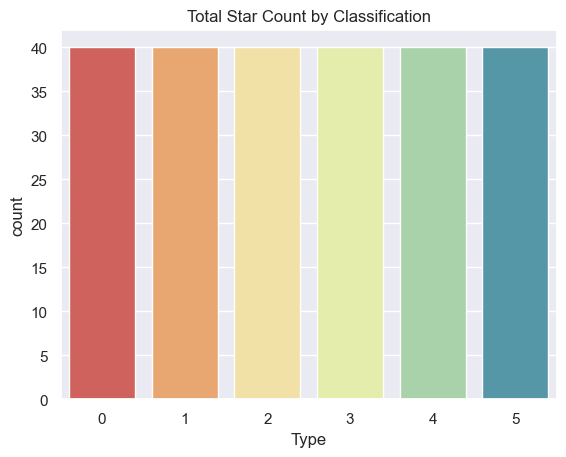

In [11]:
# set theme
sns.set_theme(style="darkgrid")

# show class type counts
plot = sns.countplot(x=data_target['Type'], palette='Spectral')
plot.set(title='Total Star Count by Classification')
plt.show()

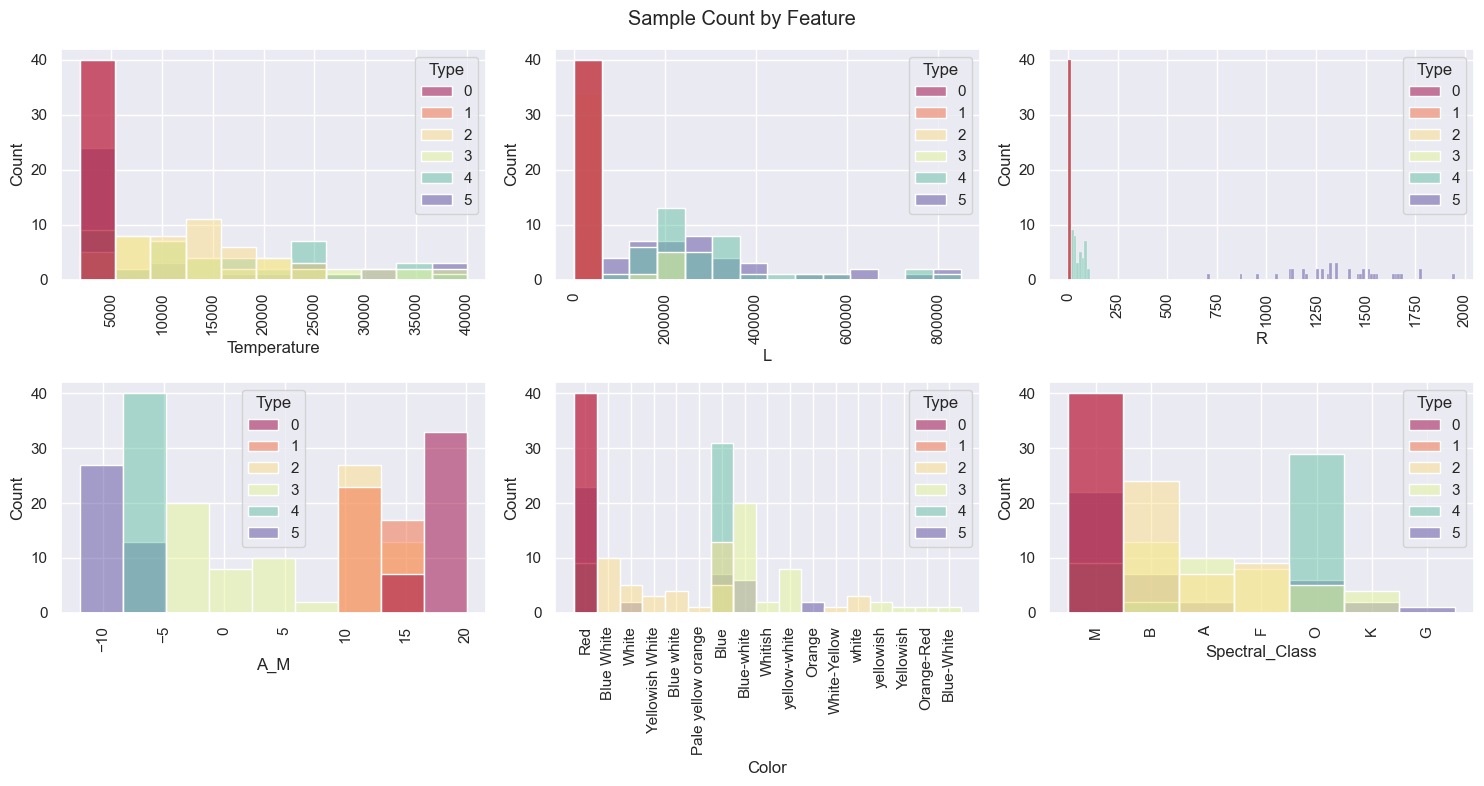

In [12]:
# count all data by feature
plot_d = data.iloc[:,0:6]
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()
for ax, col in zip(axes, plot_d.columns):
    sns.histplot(data=plot_d, 
                 x=col, 
                 ax=ax, 
                 hue=data_target['Type'], 
                 palette="Spectral")
    ax.tick_params(axis='x', rotation=90)

# title and plot layout
fig.suptitle('Sample Count by Feature')
plt.tight_layout()
plt.show()

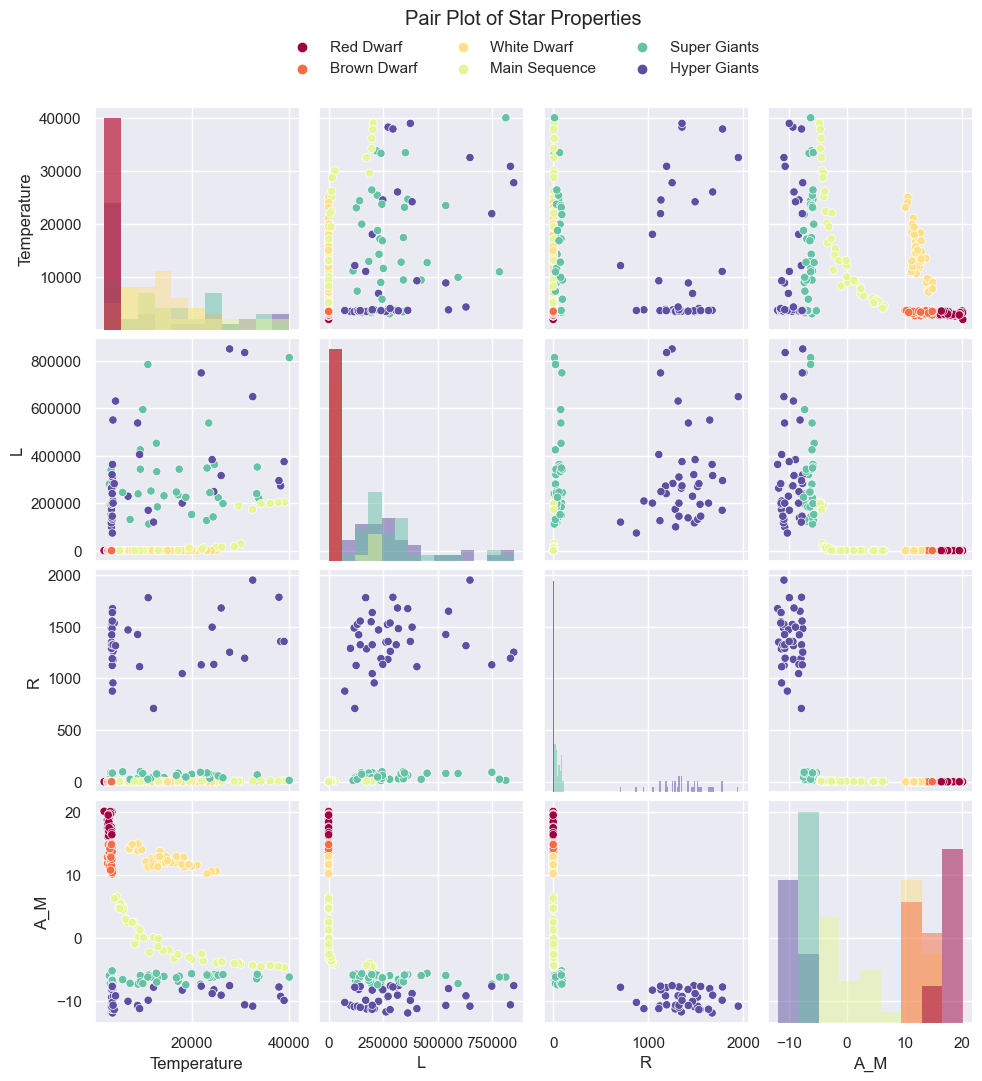

In [13]:
# pairplot to explore relation between features
plot = sns.pairplot(data, 
                    hue='Type', 
                    diag_kind="hist", 
                    diag_kws=dict(linewidth=0), 
                    palette='Spectral')

# set up plot legend
plot.fig.suptitle("Pair Plot of Star Properties", y=1.08)
for t, l in zip(plot._legend.texts, target_names):
    t.set_text(l)
sns.move_legend(plot, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

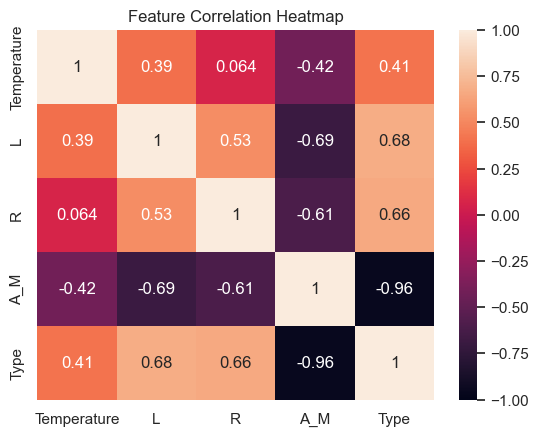

In [14]:
# set up variables
hm_data = pd.concat([data_features, data_target], axis=1)
plt.title('Feature Correlation Heatmap')

# display heatmap
sns.heatmap(hm_data.corr(), annot=True, vmin=-1, vmax=+1)
plt.show()

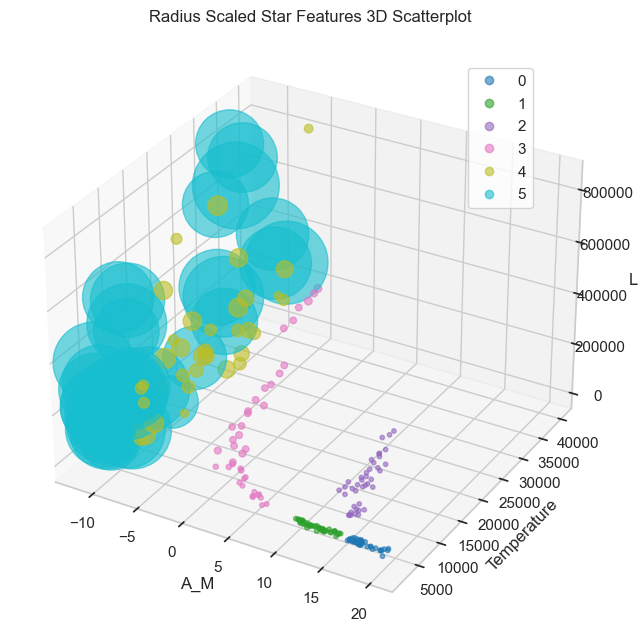

In [15]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme(style="whitegrid")

# plot three high correlated variables
p_x = data_features['A_M']
p_y = data_features['Temperature']
p_z = data_features['L']
s = data_features['R']
c = data_target['Type']
fig = plt.figure(figsize=(6,6))

# render on 3D axes
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# set up plot legend, labels, and title
sc = ax.scatter(p_x, 
                p_y, 
                p_z, 
                cmap='tab10',
                c=c, 
                s=s*2+10, 
                alpha=0.6)

# setup plot and layout
ax.set_title('Radius Scaled Star Features 3D Scatterplot')
ax.set_xlabel('A_M')
ax.set_ylabel('Temperature')
ax.set_zlabel('L')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(.75, .95), loc=2)
plt.show()

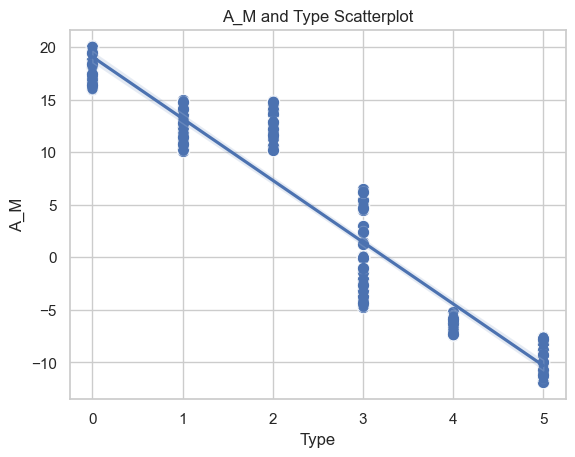

In [16]:
# plot A_M and Type
sns.scatterplot( x=data['Type'], y=data['A_M'], s=80)
sns.regplot(x=data['Type'], y=data['A_M'])
plt.title('A_M and Type Scatterplot')
plt.show()


#### Feature Observations
Observed above, this data set is well balanced. By nature of our data, some features range extreme values to encompass one class. 

Absolute magnitude (A_M) has a very high negative correlation with the star type. It is likely astronomers categorize most stars by this measurement alone.

Bonus: the scatter plots resemble the [Hertzsprung–Russell diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)

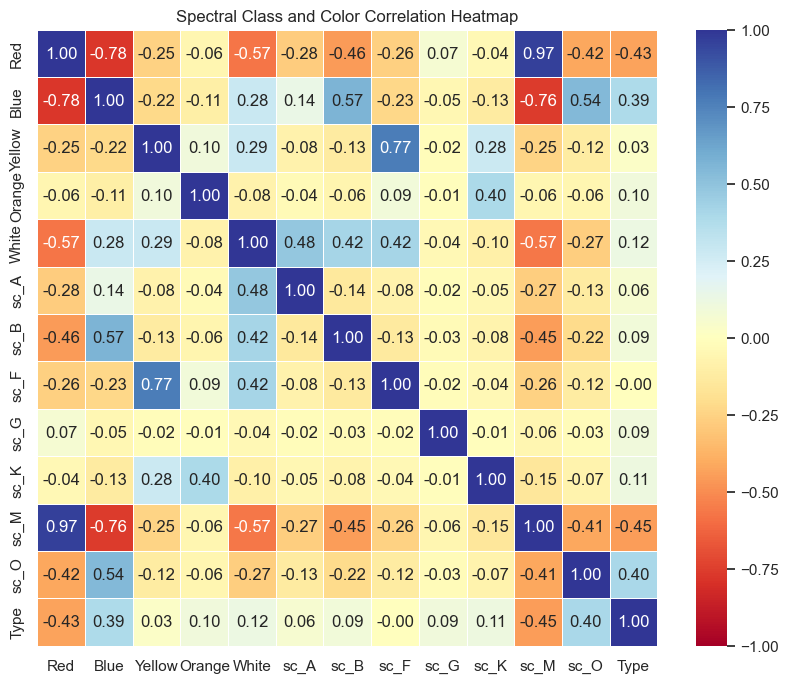

In [17]:
# set up variables
hm_emp_data = pd.concat([data_encoded_emp, data_target], axis=1)

# display heatmap
plt.figure(figsize = (10,8))
sns.heatmap(hm_emp_data.corr(), 
            annot=True, 
            cmap="RdYlBu", 
            linewidths=0.5, 
            vmin=-1, vmax=+1,
            fmt=".2f")
plt.title('Spectral Class and Color Correlation Heatmap')
plt.show()

0 Red
0.9666556422363951
1 Blue
0.5696637286911369
2 Yellow
0.7726433877117863
3 Orange
0.39609128926382914
4 White
0.48110847759312425


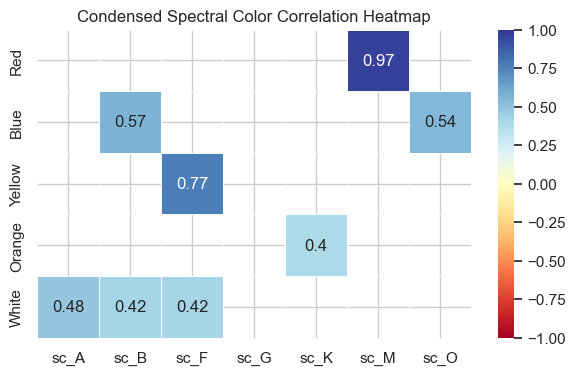

In [18]:
# sort colour and class, make some early learning assumptions
emp_correlations = data_encoded_emp.corr()
truncated = emp_correlations.iloc[0:5,5:12]

for i,col in enumerate(emp_correlations):
    if i > 4: break
    print(i, col)
    print(emp_correlations[col].sort_values()[-2])

filter_corr = truncated[truncated > 0.35]
plt.figure(figsize = (7,4))
sns.heatmap(filter_corr, 
            annot=True, 
            cmap="RdYlBu", 
            linewidths=0.5, 
            vmin=-1, vmax=+1)
plt.title('Condensed Spectral Color Correlation Heatmap')
plt.show()

#### Colour Observations
Overall, we can observe that the correlation of qualitative data is very weak or non-existent to `Type`.

Conversely, `Color` and `Spectral_Class` have strong correlations between each other, such that the observed hue may be directly related to how the star is categorized under the SMASS classification system. 
eg. Red is strongly likely to be 'M'

This further solidifies my hypothesis that these two variables are unlikely to be reliable features for predicting star `Type`.

Bonus: the colour correlation heatmap bears an striking similarity to the [Harvard Spectral Classification chart](https://en.wikipedia.org/wiki/Stellar_classification#cite_ref-calib_3-0)

## Scaling
Due to extremely large ranges on `Temperature`, `R`, and `L`, it is justified to normalize our data.\
I will choose to scale/standardize our values instead of normalization, as the data set is currently balanced.

In [19]:
# show stats
data_features.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


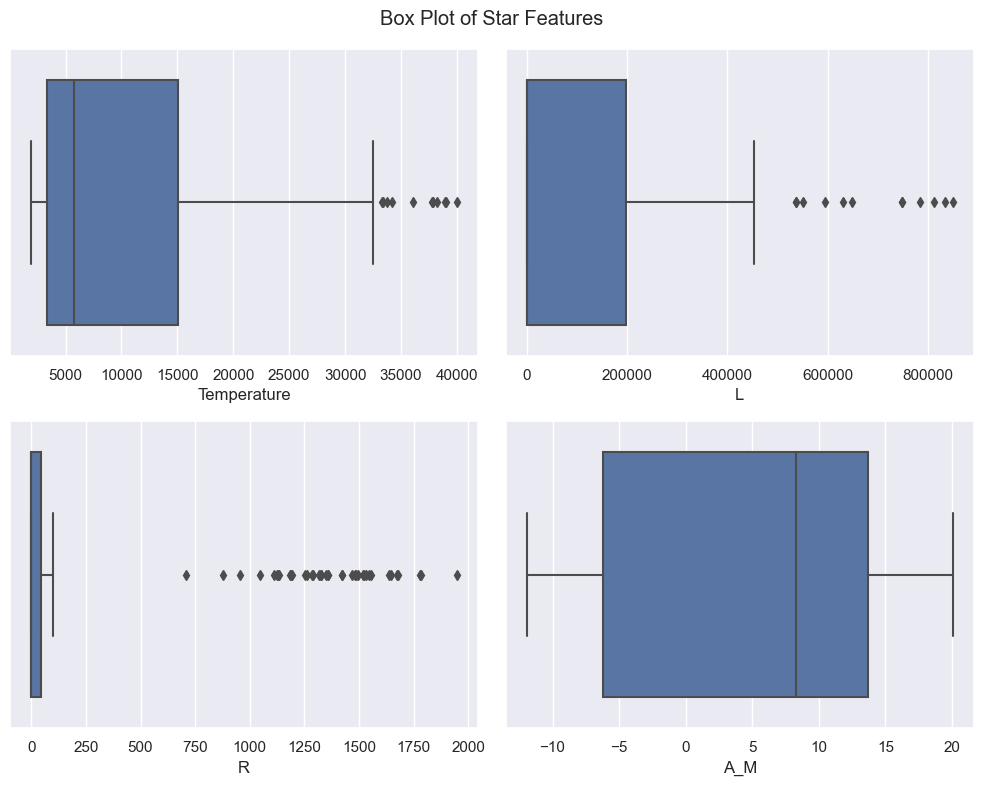

In [20]:
# draw individual box plots to examine outliers
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()
for ax, col in zip(axes, data_features.columns):
    sns.boxplot(data=data_features, 
                 x=col, 
                 ax=ax)

# set up title and layout
fig.suptitle('Box Plot of Star Features')
plt.tight_layout()
plt.show()

The standard deviation for some features is very large. The nature of our data encompasses very large units of measure- as a result, the range of values is large. This is not ideal and may cause problems when evaluating our model. 

From the box plot we can observe many outliers in the dataset. Therefore, scaling would be better than normalizing in this situation, due to the small sample size.

In [21]:
# use sklearn StandardScaler library
from sklearn.preprocessing import StandardScaler

# standardize values in data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)
data_scaled = pd.DataFrame(data_scaled, columns=data_features.columns)

# show scaled data
display(data_scaled)
display(data_scaled.describe())

,Temperature,L,R,A_M
0,-0.779382,-0.598624,-0.459210,1.116745
1,-0.782110,-0.598624,-0.459241,1.162414
2,-0.828477,-0.598624,-0.459342,1.362213
3,-0.807496,-0.598624,-0.459229,1.167171
4,-0.897819,-0.598624,-0.459340,1.491607
...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718
236,2.133913,4.059319,1.854068,-1.428317
237,-0.175029,2.403157,2.297800,-1.437832
238,-0.132438,1.662878,1.695177,-1.485403


,Temperature,L,R,A_M
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,-1.480297e-17,2.960595e-17,-1.572816e-17,-3.885781e-17
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00
min,-8.978190e-01,-5.986236e-01,-4.595230e-01,-1.551051e+00
25%,-7.504023e-01,-5.986236e-01,-4.593402e-01,-1.009928e+00
50%,-4.953014e-01,-5.986232e-01,-4.580618e-01,3.739676e-01
75%,4.781574e-01,5.074424e-01,-3.767029e-01,8.862626e-01
max,3.094941e+00,4.145201e+00,3.316058e+00,1.491607e+00


## Building the Model
Here a custom linear regression model is implemented with some custom scoring/cost functions. 

In [22]:
# define some metric functions
from sklearn.metrics import mean_squared_error
# cost calculation, squared error MSE
def mse(y_true, y_pred):
    return np.mean(np.power((y_true - y_pred), 2))

# mean absolute error MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

# root mean square error RMSE
def rmse(y_true, y_pred):
    # return np.sqrt(np.sum(np.power((y_true - y_pred), 2)))/len(y_true)
    return np.square(y_true - y_pred).mean() 

def rmse2(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# variance R2
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

# counts matches between arrays
def accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_pred)
    return accuracy

In [23]:
# code adapted from https://github.com/patrickloeber/MLfromscratch
# MSE (L2)
class myLinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y, **kwargs):
        # if kwargs['lr']: self.lr = kwargs['lr']
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def get_weights(self):
        return self.weights, self.bias
    
    # function for sklearn compatibility
    def get_params(self, deep=False):
        return {'lr':self.lr}


In [24]:
#test the model
from sklearn.model_selection import train_test_split

X = data_scaled
y = np.reshape(data_target, (240,))

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

# fit model and predict data
mlr = myLinearRegression(lr=0.01, n_iters=2000)
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

In [25]:
# test metrics
print(mse(y_test, y_pred))
print(mae(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


0.18345557576239688
0.3512744268370958
0.9435839019673904
0.0


### Validation

Our data set is quite small at a count of 240 samples. For this reason, we will use cross validation (k=5) utilizing the `cross_val_score` to create more test data for validation. \
Along with linear regression, we will also examine and compare other popular machine learning models avaliable from the Scikit-learn library.

In [26]:
# cross validate our custom linear regression model
from sklearn.model_selection import cross_val_score

mlr_cv = cross_val_score(mlr, 
                         X, 
                         y, 
                         cv=5,
                         fit_params={'lr':0.1}, 
                         scoring='r2')
print(f'cross_val scores: {mlr_cv}')

# record scores
mlr_s = [mse(y_test, y_pred), 
         mae(y_test, y_pred),
         rmse(y_test, y_pred),
         r2_score(y_test, y_pred), 
         accuracy_score(y_test, y_pred), 
         np.mean(mlr_cv)]
print(f'myLinearRegression: {mlr_s}')

cross_val scores: [0.82575442 0.90973487 0.9581639  0.91669194 0.92109417]
myLinearRegression: [0.18345557576239688, 0.3512744268370958, 0.18345557576239688, 0.9435839019673904, 0.0, 0.9062878607625164]


### Testing Other Models

In [27]:
# quick testing of other popular models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# define X and y variables
X = data_scaled
y = np.reshape(data_target, (240,))

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
ml_cv = cross_val_score(lr, X, y, cv=5)

lr_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred),  
        np.mean(ml_cv)]
print(f'LinearRegression: {lr_s}')


# Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
ml_cv = cross_val_score(logr, X, y, cv=5)

logr_s = [mse(y_test, y_pred), 
         mae(y_test, y_pred), 
         rmse(y_test, y_pred),
         r2_score(y_test, y_pred), 
         accuracy_score(y_test, y_pred), 
         np.mean(ml_cv)]
print(f'LogisticRegression: {logr_s}')


# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
ml_cv = cross_val_score(dt, X, y, cv=5)

dt_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred), 
        np.mean(ml_cv)]
print(f'DecisionTreeClassifier: {dt_s}')


# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ml_cv = cross_val_score(rf, X, y, cv=5)

rf_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred), 
        np.mean(ml_cv)]
print(f'RandomForestClassifier: {rf_s}')


# KNN n=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ml_cv = cross_val_score(knn, X, y, cv=5)

knn_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred), 
        np.mean(ml_cv)]
print(f'KNeighborsClassifier: {knn_s}')


# naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
ml_cv = cross_val_score(nb, X, y, cv=5)

nb_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred), 
        np.mean(ml_cv)]
print(f'GaussianNB: {nb_s}')


# SVM
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
ml_cv = cross_val_score(svc, X, y, cv=5)

svc_s = [mse(y_test, y_pred), 
        mae(y_test, y_pred), 
        rmse(y_test, y_pred),
        r2_score(y_test, y_pred), 
        accuracy_score(y_test, y_pred), 
        np.mean(ml_cv)]
print(f'SVC: {svc_s}')

LinearRegression: [0.18351213028180938, 0.35112123842972354, 0.18351213028180938, 0.9435482815675289, 0.0, 0.9075231665267655]
LogisticRegression: [0.10416666666666667, 0.0625, 0.10416666666666667, 0.9685519844068051, 0.9583333333333334, 0.925]
DecisionTreeClassifier: [0.0, 0.0, 0.0, 0.9999999999999998, 1.0, 0.9833333333333332]
RandomForestClassifier: [0.0, 0.0, 0.0, 0.9999999999999998, 1.0, 0.9833333333333332]
KNeighborsClassifier: [0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.9937058193095676, 0.9791666666666666, 0.9833333333333334]
GaussianNB: [0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.9876559963864053, 0.9583333333333334, 0.9916666666666666]
SVC: [0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.9876559963864053, 0.9583333333333334, 0.9541666666666666]


In [28]:
df_scores = pd.concat({
    'myLinearRegression':pd.DataFrame(mlr_s).T,
    'Linear Regression':pd.DataFrame(lr_s).T,
    'Logistic Regression':pd.DataFrame(logr_s).T,
    'Decision Tree':pd.DataFrame(dt_s).T,
    'Random Forest':pd.DataFrame(rf_s).T,
    'KNN (n=5)':pd.DataFrame(knn_s).T,
    'Naive Bayes':pd.DataFrame(nb_s).T,
    'SVM':pd.DataFrame(svc_s).T
})
df_scores.columns = ['MSE', 'MAE', 'RMSE', 'R2', 'Accuracy', 'cross_val_score']
df_scores = df_scores.round(4)
df_scores.replace(0,'-')

,,MSE,MAE,RMSE,R2,Accuracy,cross_val_score
myLinearRegression,0,0.1835,0.3513,0.1835,0.9436,-,0.9063
Linear Regression,0,0.1835,0.3511,0.1835,0.9435,-,0.9075
Logistic Regression,0,0.1042,0.0625,0.1042,0.9686,0.9583,0.9250
Decision Tree,0,-,-,-,1.0000,1.0,0.9833
Random Forest,0,-,-,-,1.0000,1.0,0.9833
KNN (n=5),0,0.0208,0.0208,0.0208,0.9937,0.9792,0.9833
Naive Bayes,0,0.0417,0.0417,0.0417,0.9877,0.9583,0.9917
SVM,0,0.0417,0.0417,0.0417,0.9877,0.9583,0.9542


# 3. Conclusion

### Performance of Results
The custom `myLinearRegression` model performs similarly to the scikit-learn one. We achieved high R2 score with low MSE, MAE, and RMSE. This means the residuals are very low and this model is a good fit for the data. Therefore the regression model is a good predictor of star type given the four quantitative features.

We can observe the three different regression models had low error margins and a respectable 0.9-0.92 mean R2 score.
This is a good generalized score. However, the weakness of this data set is highlighted by the other models. 
Decision Trees, Random Forest, KNN, and Naive Bayes had extremely high accuracy >98. This is likely a consequence of overfitting our small training sample size.

### Closing Statements
Looking at correlation of the `Color` and `Spectral_Class` features confirms both past research and my hypothesis that classification by spectral luminosity is not a reliable method to classify stars.

I hesitate to make generalized statement about this data set, because the sample size is extremely small and in a vaccuum may exist as a contrived example.
However finding tabular similarities to the [Harvard Spectral Classification chart](https://en.wikipedia.org/wiki/Stellar_classification#cite_ref-calib_3-0) and graphical resemblance to the [Hertzsprung–Russell diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) assures me that this sample is accurate and representative of the larger star population.

In this notebook, I cleaned and preprocessed data, applied for a variety of visualiztion techniques to analyze and compare data. I trained a machine learning model to predict data with high accuracies, and used statistical techniques to measure the output.
Overall, creating this notebook gave me a valuable glimpse into understandng the properties of stars and how astronomers aim to categorize them.

# References
"Machine Learning". CFA Harvard & Smithsonian,  Accessed: 5 July 2023. [1] \
Source: https://pweb.cfa.harvard.edu/research/topic/machine-learning

Baris Dincer. "Star Type Classification / NASA". Kaggle, 2021. \
Source: https://www.kaggle.com/datasets/brsdincer/star-type-classification

"Asteroid spectral types". Wikipedia, Accessed: 4 July 2023. [2]\
Source: https://simple.wikipedia.org/wiki/Asteroid_spectral_types#SMASS_classification

Eric Jensen. "Determine spectral type of star from its properties". stackexchange, 15 Aug 2020. \
Source: https://astronomy.stackexchange.com/questions/38412/determine-spectral-type-of-star-from-its-properties

R. O. Gray, M. G. Napier, & L. I. Winkler. "The Physical Basis of Luminosity Classification In The Late A-, F-, and Early G-type Stars". IOP Science, 13 Dec 2000. [3]\
Source: https://iopscience.iop.org/article/10.1086/319956/fulltext/

Morgan, W. W. & Keenan, P. C. "Spectral Classification". SAO/NASA Astrophysics Data System (ADS), 1973. [4]\
Source: https://articles.adsabs.harvard.edu//full/1973ARA%26A..11...29M/0000029.000.html

"Linear Regression". ML Cheatsheet, 2017. Accessed: 4 July 2023. \
Source: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#cost-function